In [18]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from array import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler


def fetch_data (upto_dates = 10 , tickers='BTC-USD'):
  data = yf.download(tickers=tickers, period = f'{upto_dates}d', interval = '1d')
  new_array = np.array(data.index.to_pydatetime(), dtype=np.datetime64)
  o = data.iloc[: , 0].values
  h = data.iloc[: , 1].values
  l = data.iloc[: , 2].values
  c = data.iloc[: , 3].values
  df= pd.DataFrame(new_array)
  df.columns = ['Date']
  df['Open']=o
  df['High']=h
  df['Low']=l
  df['Close']=c
  return df

In [19]:
df=fetch_data(200)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close
0,2021-03-23,54511.660156,55985.441406,53470.695312,54738.945312
1,2021-03-24,54710.488281,57262.382812,52514.332031,52774.265625
2,2021-03-25,52726.746094,53392.386719,50856.570312,51704.160156
3,2021-03-26,51683.011719,55137.312500,51579.855469,55137.312500
4,2021-03-27,55137.566406,56568.214844,54242.910156,55973.511719
...,...,...,...,...,...
195,2021-10-04,48208.906250,49456.777344,47045.003906,49112.902344
196,2021-10-05,49174.960938,51839.984375,49072.839844,51514.812500
197,2021-10-06,51486.664062,55568.464844,50488.191406,55361.449219
198,2021-10-07,55338.625000,55338.625000,53525.468750,53805.984375


In [20]:

cols =['Close']

In [21]:
df_for_training = df[cols].astype(float)
print(df_for_training.shape)
df_for_training.head(7)

(200, 1)


,Close
0,54738.945312
1,52774.265625
2,51704.160156
3,55137.312500
4,55973.511719
5,55950.746094
6,57750.199219


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [23]:
df_for_training_scaled

array([[0.73989544],
       [0.68158961],
       [0.64983207],
       [0.75171779],
       [0.77653369],
       [0.77585807],
       [0.82926047],
       [0.86390816],
       [0.86394201],
       [0.86919414],
       [0.87775608],
       [0.82491847],
       [0.85918545],
       [0.8680685 ],
       [0.84238247],
       [0.7787721 ],
       [0.84628778],
       [0.8439448 ],
       [0.88989166],
       [0.90211059],
       [0.89286585],
       [1.        ],
       [0.98831433],
       [0.99437783],
       [0.94270353],
       [0.91632159],
       [0.78373546],
       [0.76913681],
       [0.79135794],
       [0.71517877],
       [0.6515567 ],
       [0.63171402],
       [0.60076727],
       [0.56970691],
       [0.71861134],
       [0.74862558],
       [0.74244048],
       [0.70476272],
       [0.82925978],
       [0.83157087],
       [0.7960483 ],
       [0.81294089],
       [0.69818717],
       [0.81958008],
       [0.78908718],
       [0.81757376],
       [0.86052753],
       [0.843

In [29]:
trainX = []
trainY = []
n_past = 10
for i in range(n_past, len(df_for_training_scaled)):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i , 0])   # predict only open for next day

trainX = np.array(trainX)
trainY = np.array(trainY)
print('shape of trainx is :',trainX)
print('shape of trainy is :',trainY)

shape of trainx is : [[[0.73989544]
  [0.68158961]
  [0.64983207]
  ...
  [0.86390816]
  [0.86394201]
  [0.86919414]]

 [[0.68158961]
  [0.64983207]
  [0.75171779]
  ...
  [0.86394201]
  [0.86919414]
  [0.87775608]]

 [[0.64983207]
  [0.75171779]
  [0.77653369]
  ...
  [0.86919414]
  [0.87775608]
  [0.82491847]]

 ...

 [[0.39770738]
  [0.36883732]
  [0.33318966]
  ...
  [0.54583766]
  [0.57293127]
  [0.6442128 ]]

 [[0.36883732]
  [0.33318966]
  [0.34891315]
  ...
  [0.57293127]
  [0.6442128 ]
  [0.7583695 ]]

 [[0.33318966]
  [0.34891315]
  [0.41498995]
  ...
  [0.6442128 ]
  [0.7583695 ]
  [0.71220794]]]
shape of trainy is : [0.87775608 0.82491847 0.85918545 0.8680685  0.84238247 0.7787721
 0.84628778 0.8439448  0.88989166 0.90211059 0.89286585 1.
 0.98831433 0.99437783 0.94270353 0.91632159 0.78373546 0.76913681
 0.79135794 0.71517877 0.6515567  0.63171402 0.60076727 0.56970691
 0.71861134 0.74862558 0.74244048 0.70476272 0.82925978 0.83157087
 0.7960483  0.81294089 0.69818717 0.81

In [28]:
model = Sequential()
model.add(LSTM(256, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(32))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 256)           264192    
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 128)           197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 64)            49408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [30]:
history = model.fit(trainX, trainY, epochs=100,  validation_split=0.1, verbose=1)


Epoch 1/100
6/6 [==============================] - 8s 331ms/step - loss: 0.1656 - val_loss: 0.0291
Epoch 2/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0448 - val_loss: 0.0366
Epoch 3/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0366 - val_loss: 0.0243
Epoch 4/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0260 - val_loss: 0.0247
Epoch 5/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0220 - val_loss: 0.0311
Epoch 6/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0203 - val_loss: 0.0284
Epoch 7/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0174 - val_loss: 0.0369
Epoch 8/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0180 - val_loss: 0.0335
Epoch 9/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0181 - val_loss: 0.0304
Epoch 10/100
6/6 [==============================] - 0s 79ms/step - loss: 0.0184 - val_loss: 0.0299
Epoch 11/100
6/6 [

[*********************100%***********************]  1 of 1 completed
out_len : 0


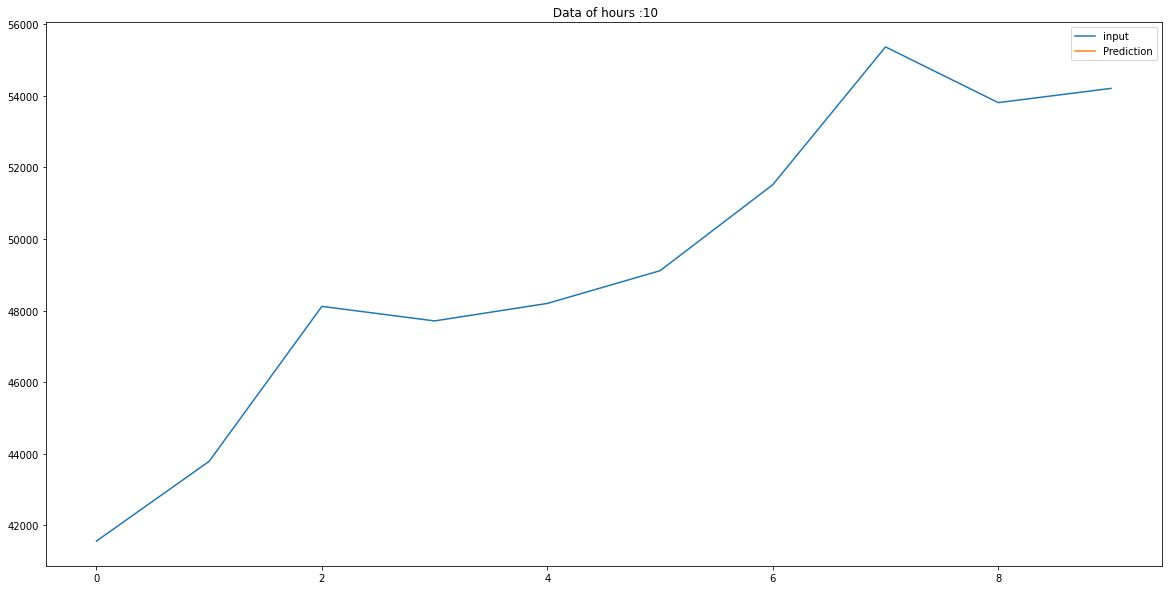

In [32]:
df=fetch_data(10)
data =df['Close']
data = np.array(data)
data1= data[:10]

input_data =data1
data_scaled = data1.reshape((n_past,1))
data_scaled = scaler.transform(data_scaled).tolist()
out_data = []
i=0
ran = len(data)-10

while(i<ran):
  x_input=data_scaled[len(data_scaled)-n_past:]
  # print(f" for input : {x_input}")
  x_input=np.array(x_input).reshape((1,n_past,1))
  y_pred = model.predict(x_input)[0][0]
  # print(f" Output is : {y_pred}")
  
  out_data.append(scaler.inverse_transform([y_pred])[0])
  data_scaled.append([y_pred])
  i=i+1
print("out_len :",len(out_data))
plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(data)),data, label='input')
plt.plot(np.arange(10,len(data)),out_data ,label='Prediction')
plt.title(f" Data of hours :{len(data)}")
plt.legend()

In [ ]:
# df=fetch_data(10)
# data =df['Open']
# data = np.array(data)
# data1= data[len(data)-n_past:]

# input_data =data1
# data_scaled = data1.reshape((n_past,1))
# data_scaled = scaler.transform(data_scaled).tolist()
# out_data = []
# i=0

# while(i<10):
#   x_input=data_scaled[len(data_scaled)-n_past:]
#   print(f" for input : {x_input}")
#   x_input=np.array(x_input).reshape((1,n_past,1))
#   y_pred = model.predict(x_input)[0][0]
#   print(f" Output is : {y_pred}")
  
#   out_data.append(scaler.inverse_transform([y_pred])[0])
#   data_scaled.append([y_pred])
#   i=i+1
# plt.figure(figsize=(20,10))
# plt.plot(np.arange(0,len(data)),data, label='input')
# plt.plot(np.arange(len(data),len(data)+i),out_data ,label='Prediction')
# plt.title(f" Data of hours :{len(data)}")
# plt.legend()

In [ ]:
len(data)

233